# Analysis of studio recordings and live performances of songs
#### This notebook contains code to analyze a dataset with musical features of songs, as provided by the spotify API. It also contains labels as to whether a song is recorded at a studio or it is a live performance.

### Let's import the required libraries

In [196]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [197]:
# Load the combined CSV file into a Pandas dataframe
df = pd.read_csv('songs.csv')

### Exploring the data

In [134]:
df.head(10)

,id,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
0,7xHATAMD7ezTZGYsNAMr5R,0.781,0.379,0,-6.147,0,0.0417,0.315000,0.000162,0.401,0.327,77.567,147840,4,live
1,69daVl60U0WWueFAUSQFih,0.875,0.612,9,-6.981,1,0.0546,0.341000,0.006200,0.951,0.413,150.093,185387,4,live
2,4gzSuZQoKUG3ztXErLlc0K,0.925,0.574,6,-5.955,0,0.0386,0.001080,0.004080,0.973,0.780,138.845,223707,4,live
3,0qYNU0d6q2797FZwc4HXoJ,0.907,0.463,1,-6.732,0,0.0889,0.065000,0.000059,0.768,0.593,165.427,267373,4,live
4,7ajzjngqdDOXNaxP2GHz4C,0.911,0.599,6,-5.715,0,0.0367,0.005530,0.004390,0.561,0.382,121.911,252973,4,live
5,05ngn5qJ42mN6HEtrxuhI7,0.965,0.567,9,-5.460,0,0.0515,0.040700,0.000005,0.974,0.489,129.006,293347,4,live
6,4unD2O56RtWAMLuZLWTWbr,0.993,0.163,3,-3.600,1,0.1420,0.000158,0.086800,0.722,0.160,175.122,178107,4,live
7,19dqbkqEgpgUZsh7FXftIs,0.951,0.644,7,-9.867,1,0.0406,0.108000,0.017200,0.657,0.971,128.091,241360,4,live
8,1DJfcWfj5dSIzksFpnRr3S,0.967,0.562,9,-4.919,0,0.2710,0.049600,0.000074,0.953,0.268,99.130,323733,4,live
9,5s457o0GLooprDJNitW5WF,0.967,0.352,1,-4.811,1,0.1540,0.000089,0.000000,0.547,0.127,144.717,233440,4,live


### Shuffle the data

In [198]:
df = df.sample(frac=1)
df.head(10)

,id,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
544,3l7Mv0MvjruDXh5WoKHEJG,0.632,0.408,1,-11.001,1,0.0925,0.033200,0.000000,0.9520,0.398,115.824,189293,3,live
2391,6RtPijgfPKROxEzTHNRiDp,0.758,0.773,1,-4.993,1,0.0381,0.042200,0.000000,0.3050,0.925,144.033,224840,4,studio
3424,29OrKlVi8EM1u8VDIlF4qO,0.983,0.505,2,-3.249,1,0.0945,0.026200,0.000002,0.2290,0.551,109.226,217413,4,studio
3475,6DGdgBp6NxutVUafsnUdnN,0.973,0.515,3,-2.158,1,0.0481,0.000318,0.000005,0.1160,0.536,123.983,197453,4,studio
3652,5knuzwU65gJK7IF5yJsuaW,0.763,0.720,9,-4.068,0,0.0523,0.406000,0.000000,0.1800,0.742,101.965,251088,4,studio
1189,3opqVSytVPvYLJs7Ja9dVR,0.508,0.338,10,-13.541,1,0.0664,0.429000,0.000008,0.8440,0.393,105.679,232933,3,live
2159,6p81GVZy2ATOBqujuyDfFP,0.942,0.388,9,-6.531,1,0.1500,0.128000,0.000000,0.9820,0.462,129.363,202493,4,live
3343,4llK75pXNWZz6KAho2Gp16,0.663,0.651,0,-5.569,0,0.0281,0.228000,0.000000,0.0994,0.465,102.000,259453,4,studio
767,0e6ES2hH2CmEpCd0umbHFq,0.979,0.344,0,-7.157,1,0.1580,0.652000,0.000737,0.9240,0.466,125.684,278267,4,live
1311,1u5wntFKJGbUjHxqLeEBu8,0.923,0.415,9,-5.427,1,0.0558,0.236000,0.000160,0.6900,0.435,156.572,406240,4,live


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 544 to 8
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4705 non-null   object 
 1   energy            4705 non-null   float64
 2   danceability      4705 non-null   float64
 3   key               4705 non-null   int64  
 4   loudness          4705 non-null   float64
 5   mode              4705 non-null   int64  
 6   speechiness       4705 non-null   float64
 7   acousticness      4705 non-null   float64
 8   instrumentalness  4705 non-null   float64
 9   liveness          4705 non-null   float64
 10  valence           4705 non-null   float64
 11  tempo             4705 non-null   float64
 12  duration_ms       4705 non-null   int64  
 13  time_signature    4705 non-null   int64  
 14  label             4705 non-null   object 
dtypes: float64(9), int64(4), object(2)
memory usage: 588.1+ KB


### Drop duplicates

In [200]:
df = df.drop_duplicates()

### What is the distribution of the labels?

In [172]:
# Count the number of samples in each class
class_counts = df['label'].value_counts()

# Print the number of samples in each class
print(class_counts)


label
live      2348
studio    2295
Name: count, dtype: int64


### Preprocessing

In [201]:
# Drop the columns 'id', 'key', 'mode' and 'signature' as well, because they are irrelevant to this analysis
df = df.drop(['id','mode', 'key', 'time_signature'] , axis=1)
# Select the numerical columns that need to be scaled
num_cols = ['energy', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Perform standardization on the selected columns
# scaler = StandardScaler()
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Map the labels to integer values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Create a dictionary mapping integer values to their corresponding labels
label_map = {i: label_encoder.inverse_transform([i])[0] for i in range(len(label_encoder.classes_))}

df.head(10)

,energy,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,label
544,0.629555,0.379982,0.567360,0.078427,0.033466,0.000000,0.950970,0.387691,0.429260,0.091247,0
2391,0.757085,0.784101,0.808036,0.016951,0.042539,0.000000,0.290092,0.942136,0.598686,0.111835,1
3424,0.984818,0.487378,0.877899,0.080687,0.026410,0.000002,0.212462,0.548659,0.389632,0.107534,1
3475,0.974696,0.498450,0.921604,0.028252,0.000319,0.000005,0.097038,0.532877,0.478264,0.095973,1
3652,0.762146,0.725421,0.845091,0.032998,0.409273,0.000000,0.162411,0.749605,0.346022,0.127038,1
1189,0.504049,0.302480,0.465609,0.048932,0.432459,0.000009,0.840654,0.382430,0.368329,0.116523,0
2159,0.943320,0.357839,0.746425,0.143406,0.129031,0.000000,0.981614,0.455024,0.510577,0.098892,0
3343,0.660931,0.649026,0.784962,0.005650,0.229837,0.000000,0.080082,0.458180,0.346232,0.131883,1
767,0.980769,0.309123,0.721348,0.152447,0.657257,0.000777,0.922370,0.459232,0.488480,0.142780,0
1311,0.924089,0.387733,0.790650,0.036953,0.237902,0.000169,0.683350,0.426618,0.673996,0.216900,0


In [166]:
label_map

{0: 'live', 1: 'studio'}

### Visualizing the data

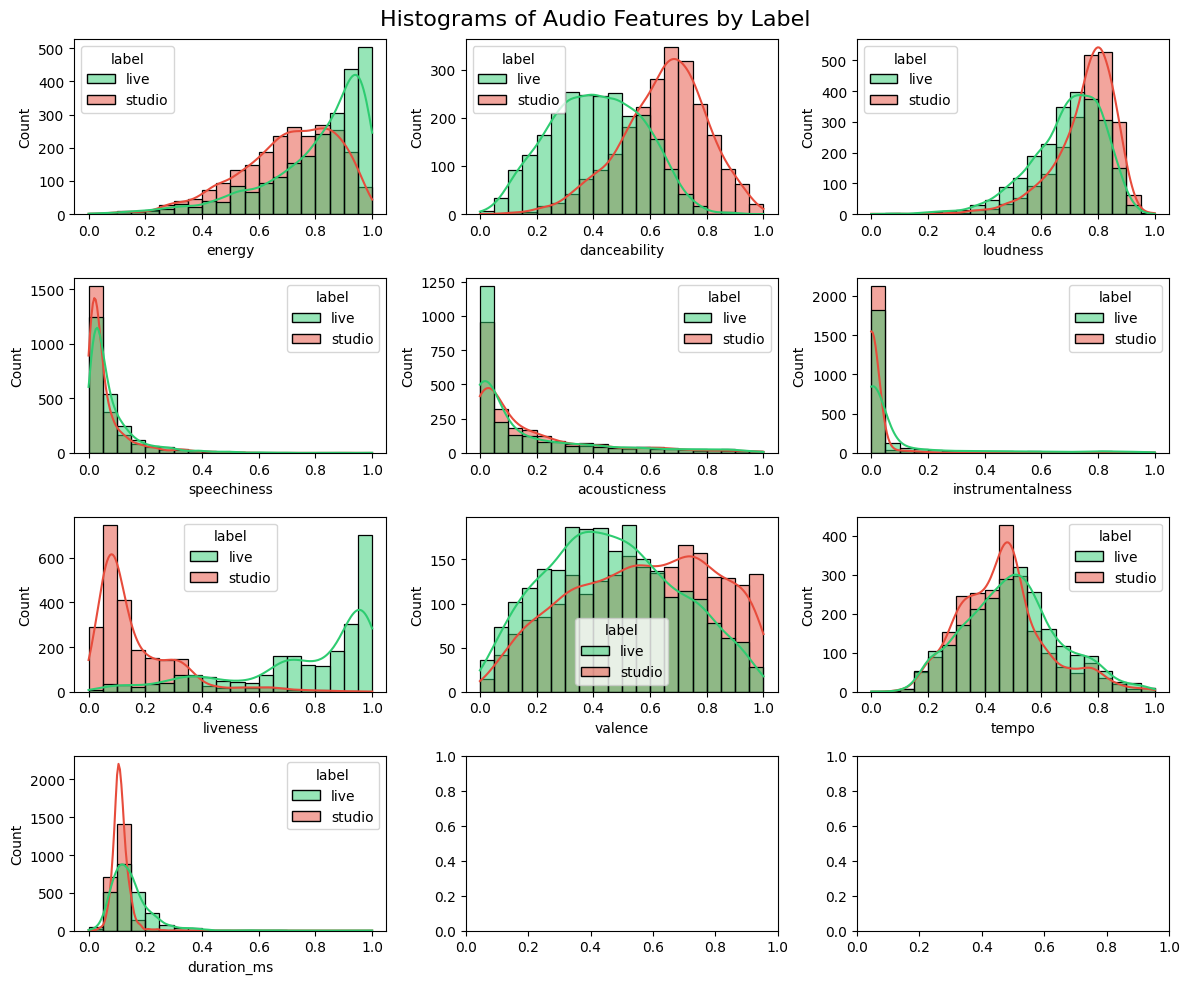

In [202]:
# Define the color palette
colors = ['#2ecc71', '#e74c3c']

nrows = 4
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i // 3, i % 3
    if row < nrows and col < ncols:
        ax = axes[row, col]
        sns.histplot(data=df, x=feature, hue=df['label'].map(label_map), ax=ax, kde=True, bins=20, palette=colors)
        ax.set_xlabel(feature)
        


# Add a title to the figure
fig.suptitle("Histograms of Audio Features by Label", fontsize=16)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the figure
plt.show()

### tSNE vs PCA

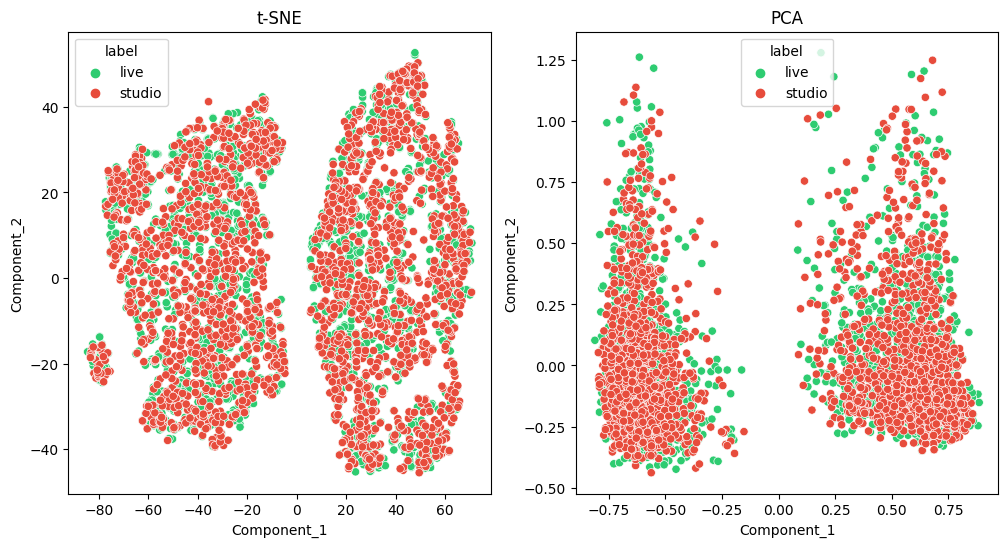

In [203]:
tsne = TSNE(n_components=2, random_state=7)
pca = PCA(n_components=2, random_state=7)

data_tsne = tsne.fit_transform(df)
data_pca = pca.fit_transform(df)

data_tsne_df = pd.DataFrame(data_tsne, columns=['Component_1', 'Component_2'])
data_pca_df = pd.DataFrame(data_pca, columns=['Component_1', 'Component_2'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(data=data_tsne_df, x="Component_1", y="Component_2", hue=df['label'].map(label_map), ax=axes[0], palette=colors)

axes[0].set_title("t-SNE")


sns.scatterplot(data=data_pca_df, x="Component_1", y="Component_2", hue=df['label'].map(label_map), ax=axes[1], palette=colors)

axes[1].set_title("PCA")

plt.show()


In [204]:
# Split the dataframe into a feature matrix (X) and a target vector (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to train and evaluate
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, )
    recall = recall_score(y_test, y_pred, )
    f1 = f1_score(y_test, y_pred,)
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')

    print()

Random Forest:
Accuracy: 0.9451
Precision: 0.9315
Recall: 0.9581
F1 score: 0.9446

SVM:
Accuracy: 0.9397
Precision: 0.9289
Recall: 0.9493
F1 score: 0.9390

Logistic Regression:
Accuracy: 0.9322
Precision: 0.9151
Recall: 0.9493
F1 score: 0.9319

KNN:
Accuracy: 0.9333
Precision: 0.9118
Recall: 0.9559
F1 score: 0.9333



cross-validation and hyperparameter tuning!